In [1]:
#we import libraries as necessary
import pandas as pd
import re
import src.columns as col
import src.manipulating_df as man
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#we wil import our previously cleaned worldwide_emissions cvs file to take conclusions out of it
world_emissions=man.open_cvs()

Please, enter the name for the cvs file you want to open without extension:
world_emissions


In [3]:
world_emissions.head()

,Year,CO2_Tonnes
0,1751,9350528.0
1,1752,18704720.0
2,1753,28058912.0
3,1754,37416768.0
4,1755,46778288.0


In [22]:
world_emissions["Year_interval"] =pd.cut(world_emissions['Year'],[-1700,1800,1900,2000,2050],labels=['<=1700','1800','1900','2000'])
world_emissions_years=world_emissions.groupby(['Year_interval']).agg({"CO2_Tonnes":["sum","mean"]})
world_emissions_years.columns

MultiIndex([('CO2_Tonnes',  'sum'),
            ('CO2_Tonnes', 'mean')],
           )

CO2_Tonnes              
                        sum          mean
Year_interval                            
<=1700         1.614617e+10  3.229234e+08
1800           1.032128e+12  1.032128e+10
1900           3.428968e+13  3.428968e+11
2000           2.216000e+13  1.303529e+12

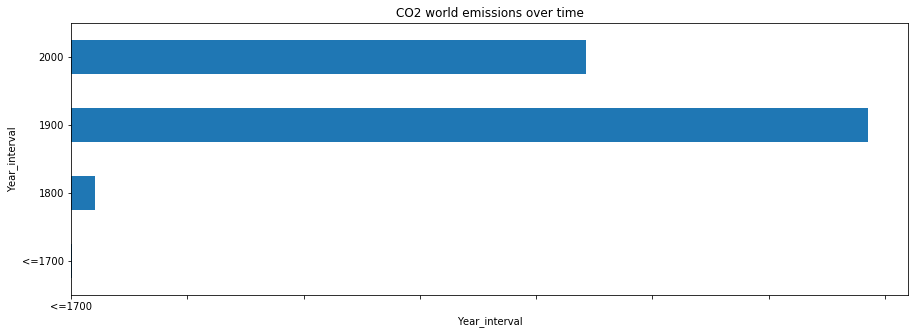

In [28]:
display(world_emissions_years)
plt.figure(figsize=(15,5))
world_emissions_years['CO2_Tonnes',  'sum'].plot.barh(title='CO2 world emissions over time')
world_emissions_years['CO2_Tonnes',  'mean'].plot(title='CO2 world emissions over time')

In [42]:
world_emissions['Year_interval'].value_counts()

1900      100
1800      100
<=1700     50
2000       17
Name: Year_interval, dtype: int64

In [49]:
world_emissions['Emissions_per_year']=round(world_emissions['CO2_Tonnes']/world_emissions['Year']*100,2)
world_emissions['Emissions_per_year']

0      5.340107e+05
1      1.067621e+06
2      1.600622e+06
3      2.133225e+06
4      2.665430e+06
           ...     
262    7.103825e+10
263    7.298908e+10
264    7.444169e+10
265    7.638889e+10
266    7.833416e+10
Name: Emissions_per_year, Length: 267, dtype: float64

In [ ]:
emissions_per_year=[]
for i in range(0,len(world_emissions['Year_interval'].value_counts())):
    if world_emissions_years['Year']
    emissions_per_year.append(round(world_emissions_years['CO2_Tonnes'].sum()/i))